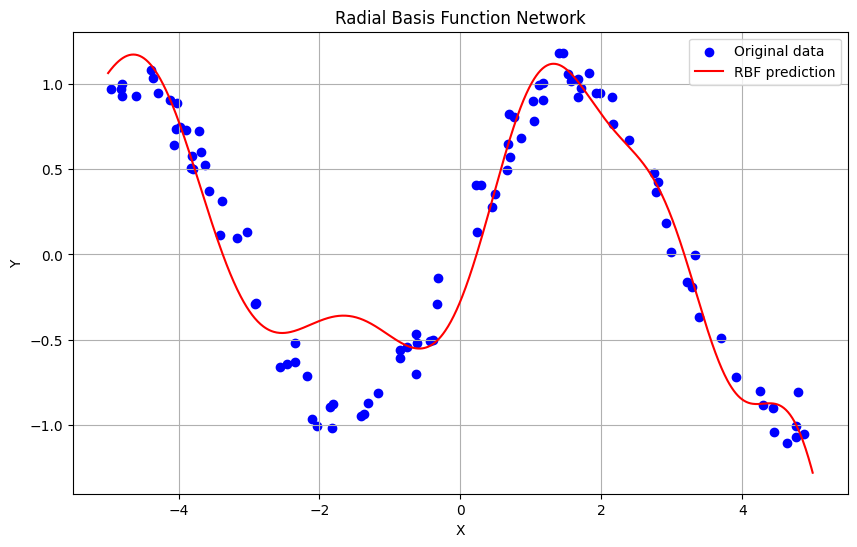

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.uniform(-5, 5, 100)
Y = np.sin(X) + np.random.normal(0, 0.1, 100)

# Radial Basis Function (Gaussian)
def gaussian_rbf(x, c, s):
    return np.exp(-1 / (2 * s**2) * (x-c)**2)

# Compute RBFs for each data point
def calculate_rbf_matrix(X, centers, width):
    RBF_matrix = np.zeros((len(X), len(centers)))
    for i, x in enumerate(X):
        for j, c in enumerate(centers):
            RBF_matrix[i, j] = gaussian_rbf(x, c, width)
    return RBF_matrix

# Choose centers randomly from data
num_centers = 10
centers = np.random.choice(X, num_centers)

# Width parameter of RBF
width = 1.0

# Compute RBF matrix
RBF_matrix = calculate_rbf_matrix(X, centers, width)

# Solve linear system using least squares regression
weights = np.linalg.lstsq(RBF_matrix, Y, rcond=None)[0]

# Predictions
def predict(X_pred, centers, weights, width):
    RBF_matrix_pred = calculate_rbf_matrix(X_pred, centers, width)
    return np.dot(RBF_matrix_pred, weights)

# Test prediction on a grid of points
X_pred = np.linspace(-5, 5, 1000)
Y_pred = predict(X_pred, centers, weights, width)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X_pred, Y_pred, color='red', label='RBF prediction')
plt.title('Radial Basis Function Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
